En este notebook se probará con el modelo de Bosque Aleatorio para predecir el rendmiento futuro con base las variables independientes de entrada.

## Importación de librerías

In [110]:
import os
import pandas as pd
import geopandas as gpd
from pathlib import PurePath
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [16]:
vis_22 = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2022"
gdf = gpd.read_file(r"C:\Users\Isai\Documents\Tesis\code\Parcelas\poligonos_parcelas.geojson")

In [64]:
vis_df = pd.DataFrame(columns=[
    'parcela',
    'vis_value',
    'precip',
    'evapo',
    'etc'
])

In [65]:
for i in os.listdir(vis_22):
    if i.endswith(".csv"):
        df = pd.read_csv(PurePath(vis_22, i))
        df['kc'] = 1.15 * df['ndvi'] + 0.17
        df['etc'] = df['kc'] * df['et']
        parcela_id = int(i.split("_")[1].split(".")[0])
        id_value = df['ndvi'].idxmax()
        vis_value = df.loc[id_value, 'ndvi']
        lluvia = df.loc[id_value, 'precip_acum']
        evapo = df['et_acum'].max()
        etc = df['etc'].sum()
        
        vis_df = vis_df._append({
            'parcela': parcela_id,
            'vis_value': vis_value,
            'precip': lluvia,
            'evapo': evapo,
            'etc': etc
        }, ignore_index=True)

C:\Users\Isai\AppData\Local\Temp\ipykernel_6020\3507826117.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  vis_df = vis_df._append({


In [66]:
merged_df = pd.merge(gdf, vis_df, left_on='Id', right_on='parcela', how='inner')

In [54]:
gdf

,Id,Productor,Ciclo,Riego,Rendimiento,Variedad,Siembra,Cosecha,geometry
0,1,Héctor Hernandez Gallegos,Resoca,Gravedad,48,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.00542 22.78566, -99.00614 22.785..."
1,2,Maria Antonia Torres Alvarado,Resoca,Gravedad,60,CP:722086,2022-02-20,2023-04-12,"POLYGON ((-98.99928 22.81571, -98.99885 22.814..."
2,3,Juan Ariel Izaguirre Paz,Resoca,Bombeo,45,CP:722086,2022-02-05,2023-03-01,"POLYGON ((-99.05606 22.85935, -99.05612 22.859..."
3,4,Alfredo Esaul Cruz Paz,Resoca,Gravedad,50,CP:722086,2022-01-15,2023-03-20,"POLYGON ((-99.00965 22.79491, -99.01129 22.793..."
4,5,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.01532 22.94014, -99.01598 22.939..."
5,6,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.01206 22.94233, -99.01176 22.940..."
6,7,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.00999 22.94357, -99.01000 22.942..."
7,8,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.00721 22.94363, -99.00721 22.943..."
8,9,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.00504 22.94365, -99.00505 22.940..."
9,10,Ana Isabel Govea Echavarría,Resoca,Gravedad,75,CP:722086,2022-02-02,2023-04-15,"POLYGON ((-99.00253 22.94365, -99.00259 22.940..."


In [67]:
merged_df.drop(columns=['Productor', 'Ciclo', 'Riego', 'Variedad', 'Siembra', 'Cosecha', 'geometry'], inplace=True)

In [68]:
merged_df.corr(method='pearson')

,Id,Rendimiento,parcela,vis_value,precip,evapo,etc
Id,1.000000,-0.244834,1.000000,-0.213486,0.179818,-0.215818,-0.251858
Rendimiento,-0.244834,1.000000,-0.244834,0.895832,-0.530568,0.049267,0.612164
parcela,1.000000,-0.244834,1.000000,-0.213486,0.179818,-0.215818,-0.251858
vis_value,-0.213486,0.895832,-0.213486,1.000000,-0.433723,-0.221252,0.427193
precip,0.179818,-0.530568,0.179818,-0.433723,1.000000,-0.021140,-0.502967
evapo,-0.215818,0.049267,-0.215818,-0.221252,-0.021140,1.000000,0.724570
etc,-0.251858,0.612164,-0.251858,0.427193,-0.502967,0.724570,1.000000


             Rendimiento       etc
Rendimiento     1.000000  0.612164
etc             0.612164  1.000000


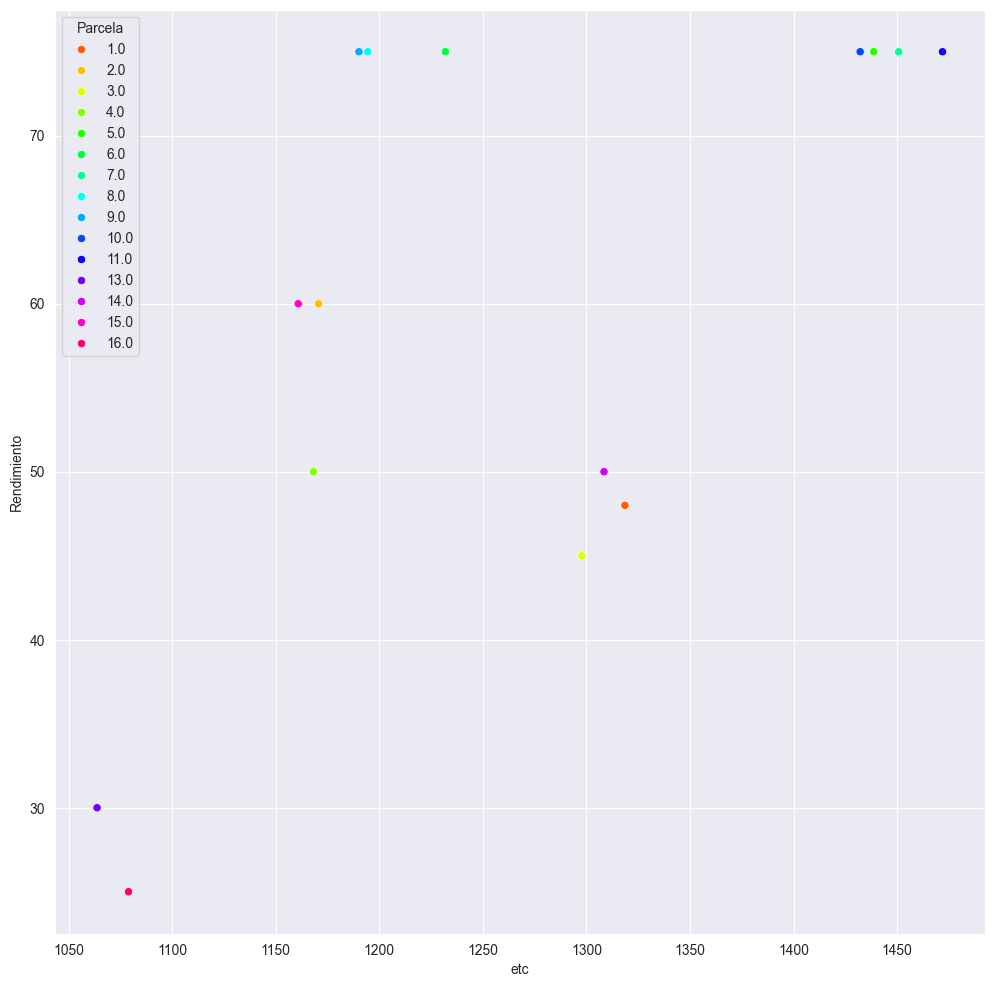

In [128]:
ids = merged_df['parcela'].unique()
palette = sns.color_palette("hsv", len(ids))
print(merged_df[['Rendimiento', 'etc']].corr(method='pearson'))

plt.figure(figsize=(12, 12))
sns.scatterplot(data=merged_df, x='etc', y='Rendimiento', hue='parcela', palette=palette)
plt.legend(title='Parcela')
plt.show()

## Modelo de Bosque Aleatorio

In [78]:
x_data = merged_df[['vis_value', 'etc']]
y_data = merged_df['Rendimiento']

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [102]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

In [103]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [126]:
y_pred = model.predict(x_test)
y_pred_2 = model.predict(x_data)
print('test_predict: ', model.predict([[0.8, 1000]]))

test_predict:  [63.45]


C:\Users\Isai\Documents\Tesis\code\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [105]:
merged_df['pred'] = y_pred_2
merged_df

,Id,Rendimiento,parcela,vis_value,precip,evapo,etc,pred
0,1,48,1.0,0.645529,582.23,1886.316309,1318.566277,45.90
1,2,60,2.0,0.775832,564.31,1422.811525,1170.671495,64.50
2,3,45,3.0,0.676195,547.55,1621.391020,1297.730937,47.95
3,4,50,4.0,0.753330,613.87,1513.698949,1168.169636,54.40
4,5,75,5.0,0.772565,588.12,1756.679528,1438.664551,75.00
5,6,75,6.0,0.768541,573.43,1503.025045,1231.884026,74.70
6,7,75,7.0,0.791956,547.35,1682.083499,1450.693650,74.85
7,8,75,8.0,0.767247,571.98,1470.590239,1194.453985,73.70
8,9,75,9.0,0.771219,572.84,1470.590239,1190.157430,73.95
9,10,75,10.0,0.773828,558.62,1661.333266,1432.128150,74.85


In [106]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {r2}")

Error cuadrático medio: 39.285
Coeficiente de determinación: 0.8851315789473684


<Axes: xlabel='Rendimiento'>

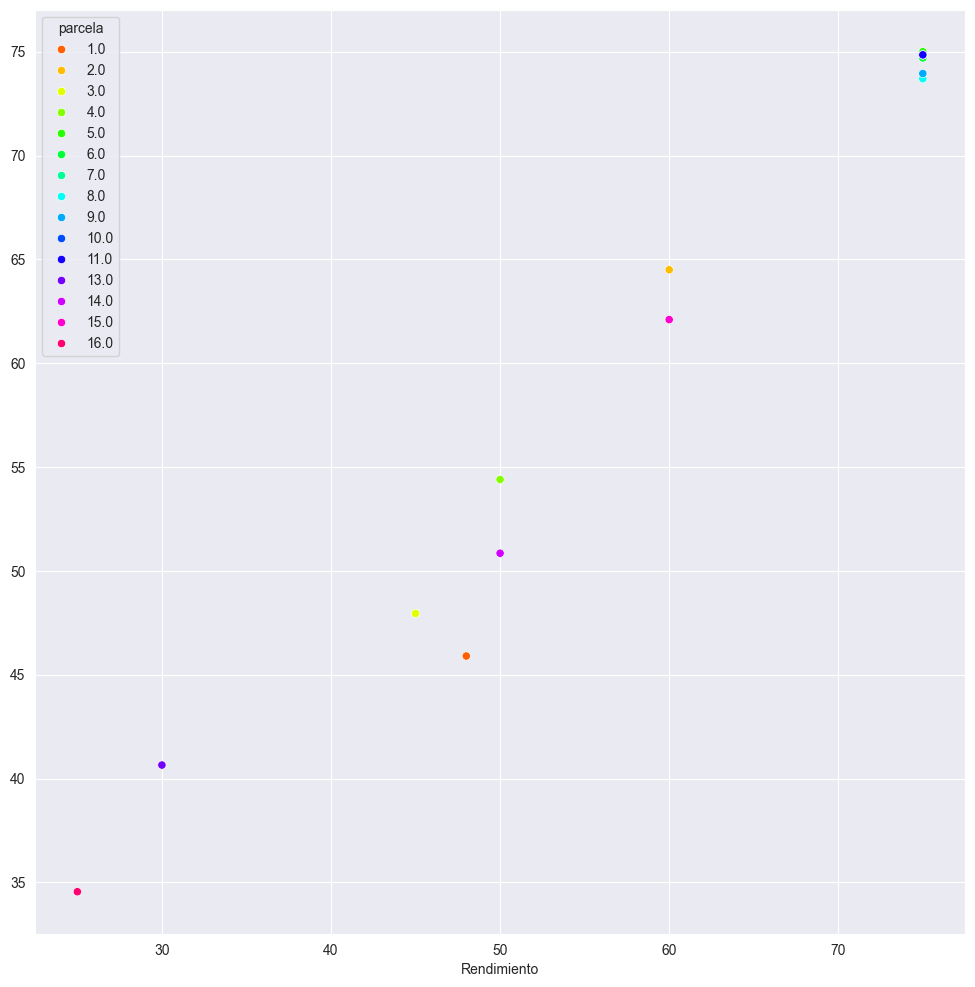

In [109]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x=y_data, y=y_pred_2, hue=merged_df['parcela'], palette=palette)

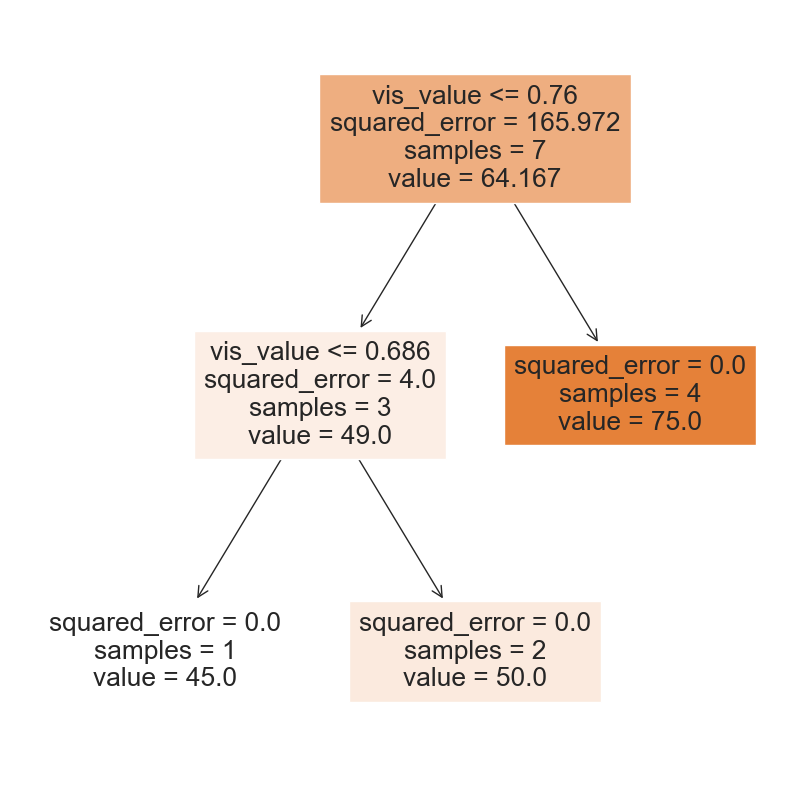

In [127]:
arbol_1 = model.estimators_[0]
plt.figure(figsize=(10, 10))
plot_tree(arbol_1, filled=True, feature_names=x_data.columns)
plt.show()